# Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el datase , csv

In [2]:
csv = pd.read_csv('Ventas_minorista_en_linea.csv')  # dentro de la variable csv se guarda el archivo data.csv

In [3]:
print(csv.describe())                   # Descripcion

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [4]:
print(csv.info())                    # Informacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


# Mostramos los datos duplicados y nuelos

In [5]:
# Mostrar duplicados por columna 
for col in csv.columns:
    duplicados = csv[col].duplicated().sum()  # Sumar los duplicados en cada columna
    print(f"{col}: {duplicados}")

InvoiceNo: 516009
StockCode: 537839
Description: 537685
Quantity: 541187
InvoiceDate: 518649
UnitPrice: 540279
CustomerID: 537536
Country: 541871


In [6]:
csv.isnull().sum()                 # Vemos en cada columna cuantos valores nulos hay

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
unicos_valores = {}                                     # Creacion de un diccionario vacio para guardar los valores unicos de cada columna

# Recorremos cada columna del DataFrame
for columna in csv.columns:
    unicos_valores[columna] = csv[columna].unique()     # Guardamos los valores únicos de la columna en el diccionario

# Mostramos los valores únicos de cada columna
for col, values in unicos_valores.items(): 
    print(f"Columna: {col}")                            # Imprime nombre de la columna
    print(f"Cuantos Valores unicos hay: {len(values)}")   # Mostrara cuantos valores unicos hay
    print(f"Valores Unicos: {values[:10]}")             # Mostrara los primeros 10 valores unicos
    print("-" * 50) 

Columna: InvoiceNo
Cuantos Valores unicos hay: 25900
Valores Unicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Cuantos Valores unicos hay: 4070
Valores Unicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Cuantos Valores unicos hay: 4224
Valores Unicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Cuantos Valores unicos hay: 722
Valores Unicos: [ 6  8  2 32  3  4 24 12 48 18]
-----------------------------------------

# Limpiza de datos duplicados y nulos

In [8]:
datos_duplicados = csv.drop_duplicates()  # Eliminamos los datos duplicados

datos_duplicados.duplicated().sum()  # Vemos cuantos valores duplicados hay


0

In [9]:
datos_nulos = csv.dropna()  # Eliminamos los datos nulos de cada columna

datos_nulos.isnull().sum()  # Vemos cuantos valores nulos hay en cada columna

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Multiplicamos el total de la columna Cantidad y Precio unitario

In [10]:
# Creamos una nueva columna llamada TotalAmount para guardar el total de la compra
csv['TotalAmount'] = csv['Quantity'] * csv['UnitPrice'] 
csv.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Convertimos la fecha a tipo datetime 

In [11]:
csv.info()  # Vemos el tipo de InvoceDate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalAmount  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [12]:
 # Convertimos la columna InvoiceDate a tipo datetime
csv['InvoiceDate'] = pd.to_datetime(csv['InvoiceDate']) 
csv.head()  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Nuevas columnas para Año - Mes - Dia - Hora

In [13]:
# Creamos nuevas columnas para el año, mes, día y hora llamando a la columna InvoiceDate
csv['Year'] = csv['InvoiceDate'].dt.year
csv['Month'] = csv['InvoiceDate'].dt.month
csv['Day'] = csv['InvoiceDate'].dt.day
csv['Hour'] = csv['InvoiceDate'].dt.hour

csv.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8


In [14]:
# Llamamos a la columna Year y sumamos los valores de la columna TotalAmount
ventas_por_año = csv.groupby('Year')['TotalAmount'].sum()

ventas_por_año

Year
2010     748957.020
2011    8998790.914
Name: TotalAmount, dtype: float64

# Separar los semestres por mes

In [15]:
# Definir una función para asignar el semestre
def asignar_semestre(month):
    # si el mes es menor o igual a 6, entonces es el primer semestre
    if month <= 6:
        return 1  # Primer semestre
    # si el mes es mayor a 6, entonces es el segundo semestre
    else:
        return 2  # Segundo semestre

# Creamos una nueva columna llamada Semester para guardar el semestre
csv['Semester'] = csv['Month'].apply(asignar_semestre)

csv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,Semester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


# Análisis de Ventas por Semestre y por año 

In [16]:
# Llamamos a las columnas Year y Semester y sumamos los valores de la columna TotalAmount para obtener las ventas por semestre
ventas_por_semestre = csv.groupby(['Year', 'Semester'])['TotalAmount'].sum()
ventas_por_semestre

Year  Semester
2010  2            748957.020
2011  1           3648993.741
      2           5349797.173
Name: TotalAmount, dtype: float64

# Separar el trimestral de cada mes

In [17]:
# funcion para trimestral 
def asignar_trimestre(month):
    # si el mes es menor o igual a 3, entonces es el primer trimestre
    if month <= 3:
        return 1 # Primer trimestre
    # si el mes es menor o igual a 6, entonces es el segundo trimestre
    elif month <= 6:
        return 2 # Segundo trimestre
    # si el mes es menor o igual a 9, entonces es el tercer trimestre   
    elif month <= 9:
        return 3 # Tercer trimestre
    # si el mes es menor o igual a 12, entonces es el cuarto trimestre
    else:
        return 4 # Cuarto trimestre
    
# Creamos una nueva columna llamada Trimestre para guardar el trimestre
csv['Trimestre'] = csv['Month'].apply(asignar_trimestre)

csv.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,Semester,Trimestre
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4


# Analizar las ventas por cada Trimestre y por año

In [18]:
# Llamamos a las columnas Year y Trimestre y sumamos los valores de la columna TotalAmount para obtener las ventas por trimestre
ventas_por_trimestre = csv.groupby(['Year', 'Trimestre'])['TotalAmount'].sum()
ventas_por_trimestre

Year  Trimestre
2010  4             748957.020
2011  1            1741329.990
      2            1907663.751
      3            2383668.243
      4            2966128.930
Name: TotalAmount, dtype: float64

# Retornar los valores menores que 0 

In [19]:
# Llamamos a la columna Quantity y contadara los valores menores a 0 para obtener la cantidad de productos devueltos
reotornal_total_menores = csv[csv['Quantity'] < 0].shape[0] 
reotornal_total_menores

10624

# Retornar los valores mayores que 0

In [20]:
# Llamamos a la columna Quantity y contadara los valores mayores o iguales a 0 para obtener la cantidad de productos vendidos
retornar_total_mayores = csv[csv['Quantity'] >= 0].shape[0]
retornar_total_mayores

531285

# Grafico de la tabla Quantity de sus valores

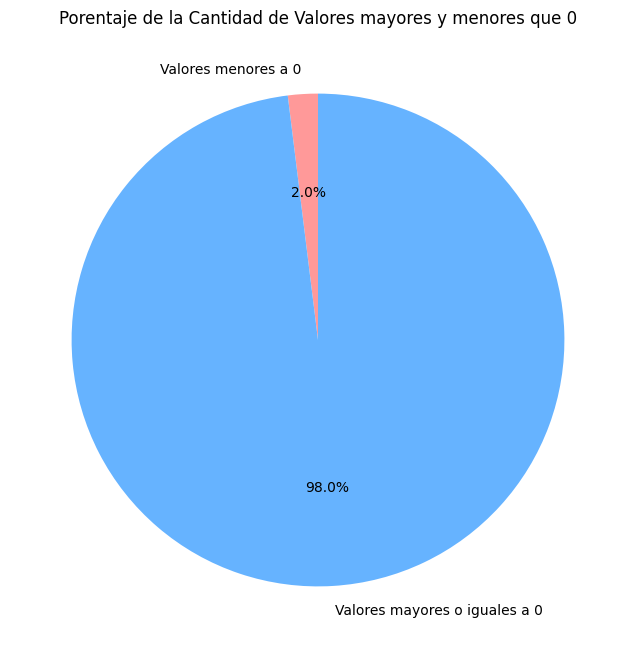

In [21]:
labels = ['Valores menores a 0', 'Valores mayores o iguales a 0'] 
sizes = [reotornal_total_menores, retornar_total_mayores]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Porentaje de la Cantidad de Valores mayores y menores que 0')
plt.show()

# Creamos la columna AmounCategory para guardar el monto de la tabla TotalAmount

In [22]:
# Creamos una funcion para ver la columna TotalAmount y asignar una categoria segun el monto
def categoria_total_amount(amount):
    if amount < 20:     # Si el monto es menor a 20, entonces es bajo
        return 'Bajo'
    elif amount < 100:  # Si el monto es menor a 100 y mayor a 20 , entonces es medio
        return 'Medio'
    else:               # Si el monto es mayor a 100, entonces es alto
        return 'Alto'

# Creamos una nueva columna llamada AmountCategory para guardar la categoria del monto
csv['AmountCategory'] = csv['TotalAmount'].apply(categoria_total_amount)

csv

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,Semester,Trimestre,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,4,Bajo
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,4,Medio
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,2,4,Bajo
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,2,4,Bajo
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,2,4,Bajo
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,2,4,Bajo


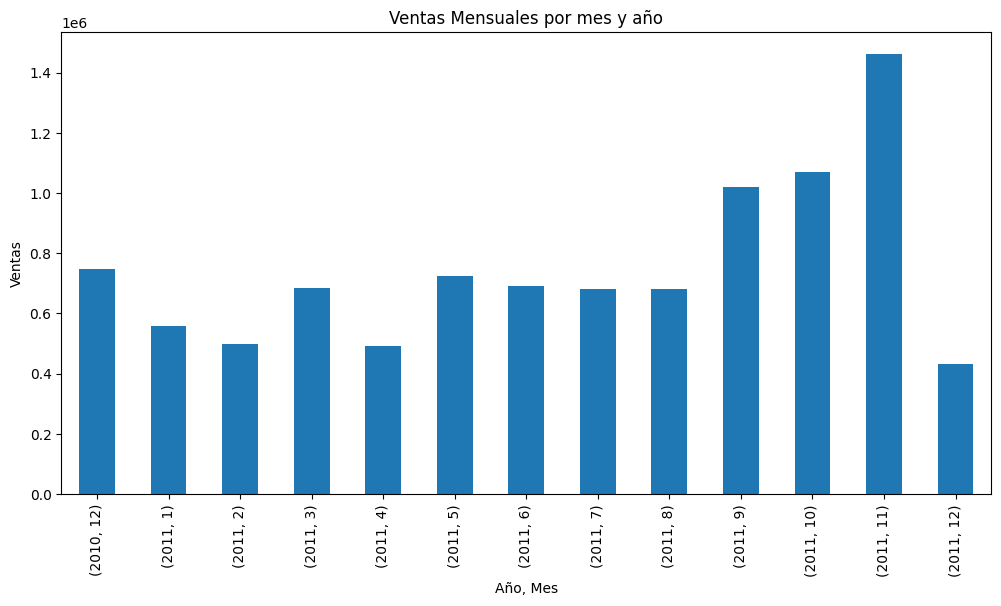

In [23]:
plt.figure(figsize=(12, 6))     # Tamaño de la figura
# Llamamos a la columna Year y Month y sumamos los valores de la columna TotalAmount para obtener las ventas mensuales
csv.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')    # Grafico de barras 
plt.title('Ventas Mensuales por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas')
plt.show()

# Vemos si hay valores nulos en la columna Description

In [24]:
print(csv['Description'])        # Mostrara la columna Description


0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object


# Llenamos los valores nulos con un texto

In [25]:
# Llenar los valores nulos de la columna Description con 'Sin Descripción'
csv['Description'] = csv['Description'].fillna('Sin Descripción')
csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,Semester,Trimestre,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,4,Bajo
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,4,Medio
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,2,4,Bajo
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,2,4,Bajo
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,2,4,Bajo
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,2,4,Bajo


# Convertir la columna Description a valores string

In [26]:
# Convertir la columna Description a tipo string
csv['Description'] = csv['Description'].astype(str)
csv

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,Semester,Trimestre,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,4,Bajo
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,4,Medio
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,4,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,2,4,Bajo
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,2,4,Bajo
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,2,4,Bajo
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,2,4,Bajo


# Selecciona los 10 productos más vendidos agrupados por su código (StockCode) y calcula la cantidad total vendida de cada uno

In [27]:
top_productos  = csv.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)  # Llamamos a la columna StockCode y Quantity y sumamos los valores de la columna Quantity para obtener los productos más vendidos
top_productos = top_productos.reset_index()                                                        # Reiniciamos el índice
top_productos = pd.merge(top_productos, csv[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left') # Aca se unen las columnas StockCode y Description

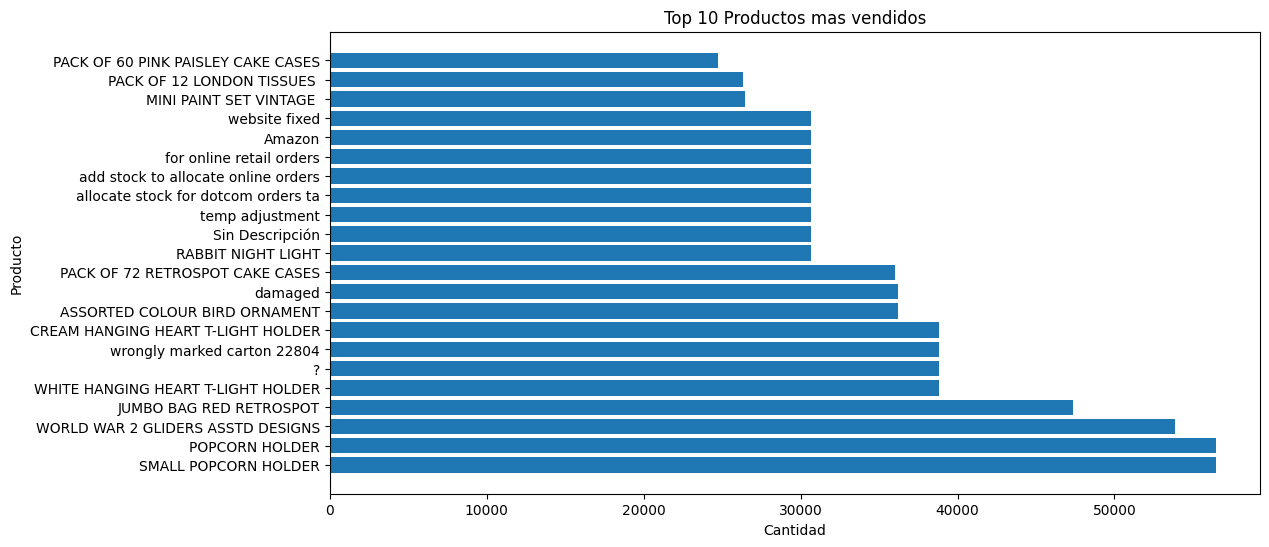

In [28]:
plt.figure(figsize=(12, 6))     # Tamaño de la figura
plt.barh(top_productos['Description'],top_productos['Quantity'])  # Gráfico de barras
plt.title('Top 10 Productos mas vendidos')
plt.xlabel('Cantidad')
plt.ylabel('Producto')
plt.show()